In [1]:
#IMPORTING LIBRARAIES
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [4]:
#LOADING THE STOCK DATA
data = pd.read_csv("AXISBANK.csv")

In [5]:
#It display the first five data from the dataset
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [6]:
#EXTRACTING THE "CLOSE" PRICES
close_price = data['Close'].values.reshape(-1,1)

In [7]:
#NORMALIZING THE DATA
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(close_price)

In [8]:
#SPLIT THE DATA INTO TRAINING AND TESTING SETS
train_size = int(len(scaled_prices)*0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [9]:
#CREATING SEQUENCES OF DATA
def create_sequences(data,sequence_length):
  x=[]
  y=[]
  for i in range(len(data)-sequence_length):
    x.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])
  return np.array(x), np.array(y)

#NUMBER OF PREVIOUS DAYS TO USE FOR PREDICTION
sequence_length = 30

In [10]:
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

In [11]:
#BUILD THE LSTM MODEL
model = Sequential()
model.add(LSTM(40, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(40))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#TRAIN THE MODEL
model.fit(x_train,y_train, epochs=10, batch_size=20)

Epoch 1/10
211/211 [==============================] - 12s 21ms/step - loss: 0.0031
Epoch 2/10
211/211 [==============================] - 5s 22ms/step - loss: 0.0013
Epoch 3/10
211/211 [==============================] - 5s 22ms/step - loss: 0.0010
Epoch 4/10
211/211 [==============================] - 5s 22ms/step - loss: 8.5466e-04
Epoch 5/10
211/211 [==============================] - 5s 22ms/step - loss: 7.2442e-04
Epoch 6/10
211/211 [==============================] - 5s 22ms/step - loss: 5.9412e-04
Epoch 7/10
211/211 [==============================] - 5s 23ms/step - loss: 5.6912e-04
Epoch 8/10
211/211 [==============================] - 5s 24ms/step - loss: 5.4067e-04
Epoch 9/10
211/211 [==============================] - 5s 26ms/step - loss: 4.1670e-04
Epoch 10/10
211/211 [==============================] - 5s 25ms/step - loss: 4.9120e-04


In [13]:
#MAKE PREDICTION ON THE TEST DATA
prediction = model.predict(x_test)

33/33 [==============================] - 7s 9ms/step


In [14]:
#INVERSE THE SCALING
prediction = scaler.inverse_transform(prediction)
y_test = scaler.inverse_transform(y_test)

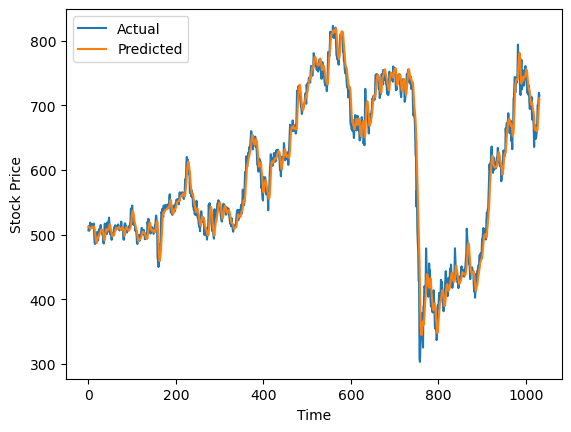

In [15]:
#PLOT THE VISUALIZATION
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()